<a href="https://colab.research.google.com/github/Pooooj/Machine-Failure-prediction/blob/main/Machine_failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
#mount the drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Machine Failure Prediction/Predictive_Maintenance_Case_Study.csv')

Mounted at /content/drive


In [3]:
copydata=data.copy()


In [4]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [5]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [6]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [7]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

UNIVARIATE ANALYSIS

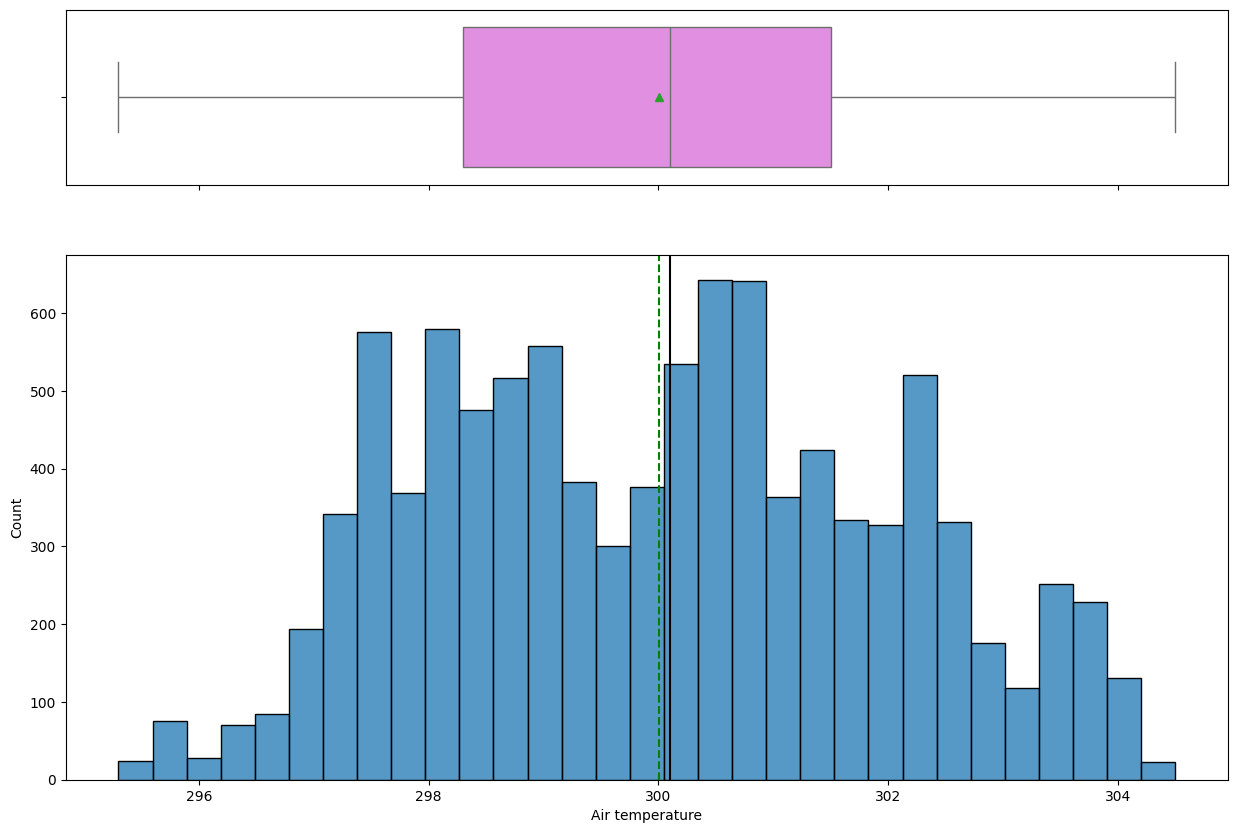

In [8]:
histogram_boxplot(data, "Air temperature")

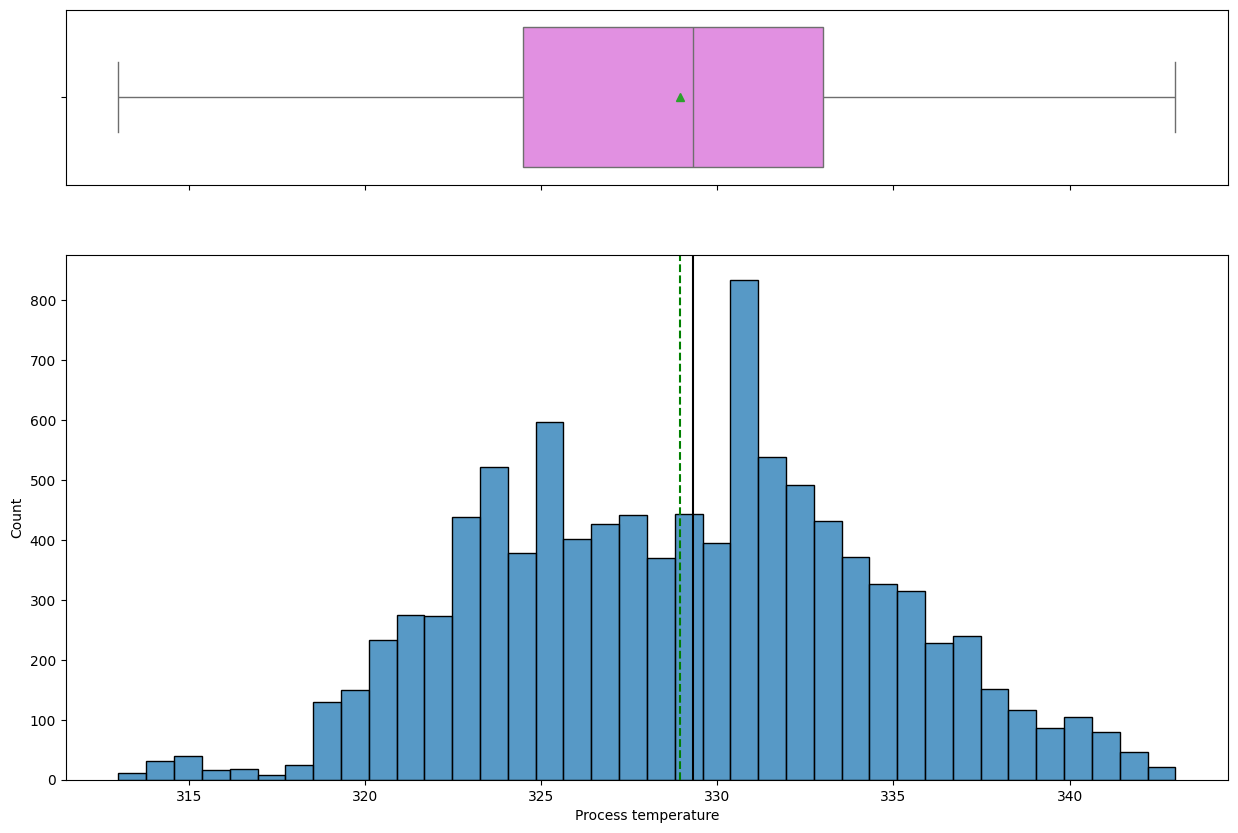

In [9]:
histogram_boxplot(data, "Process temperature")

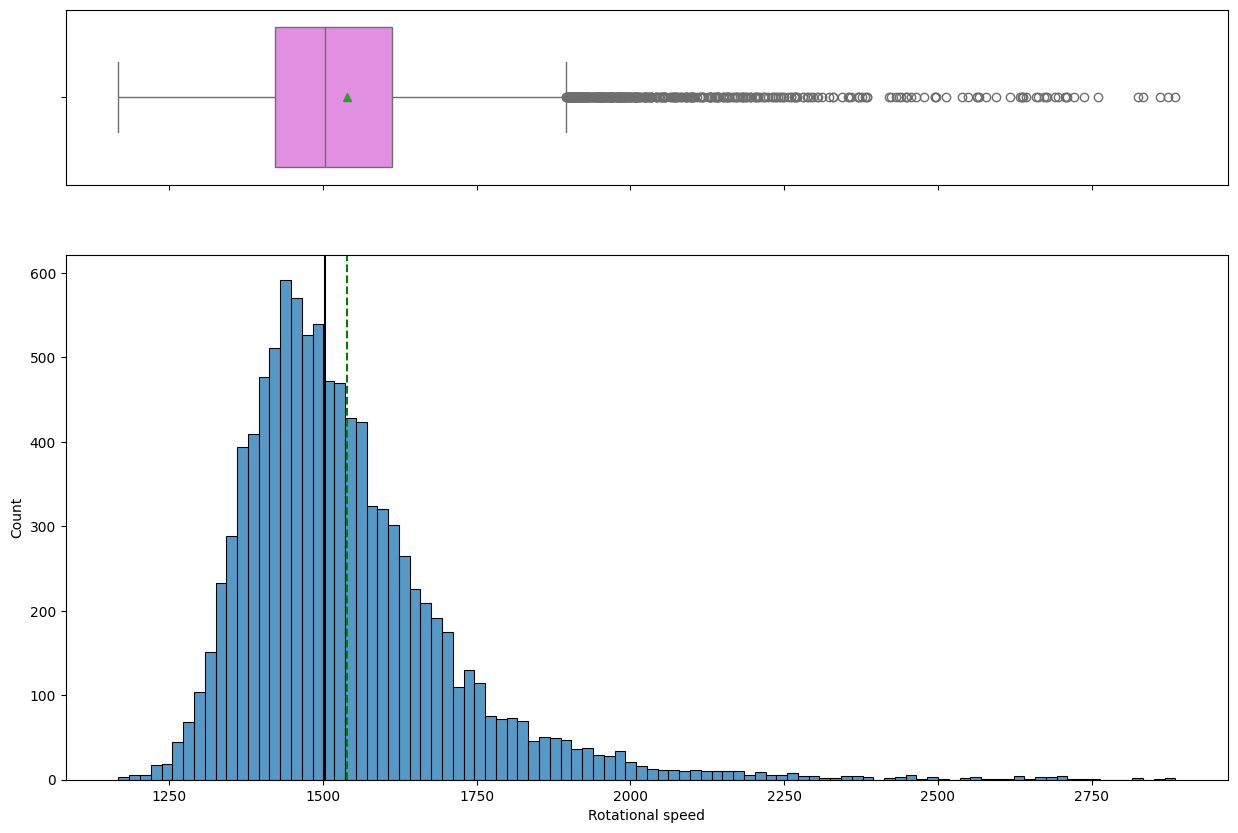

In [10]:
histogram_boxplot(data, "Rotational speed")

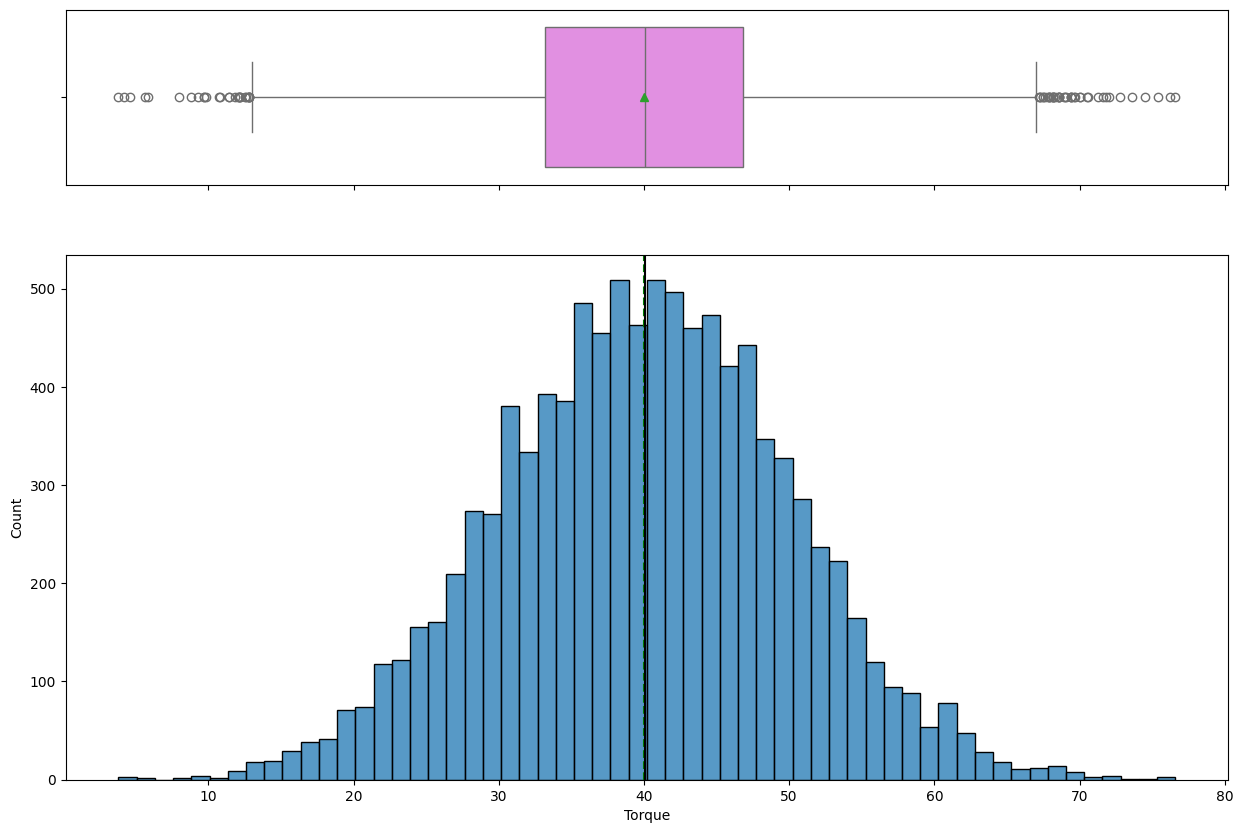

In [11]:
histogram_boxplot(data, "Torque")

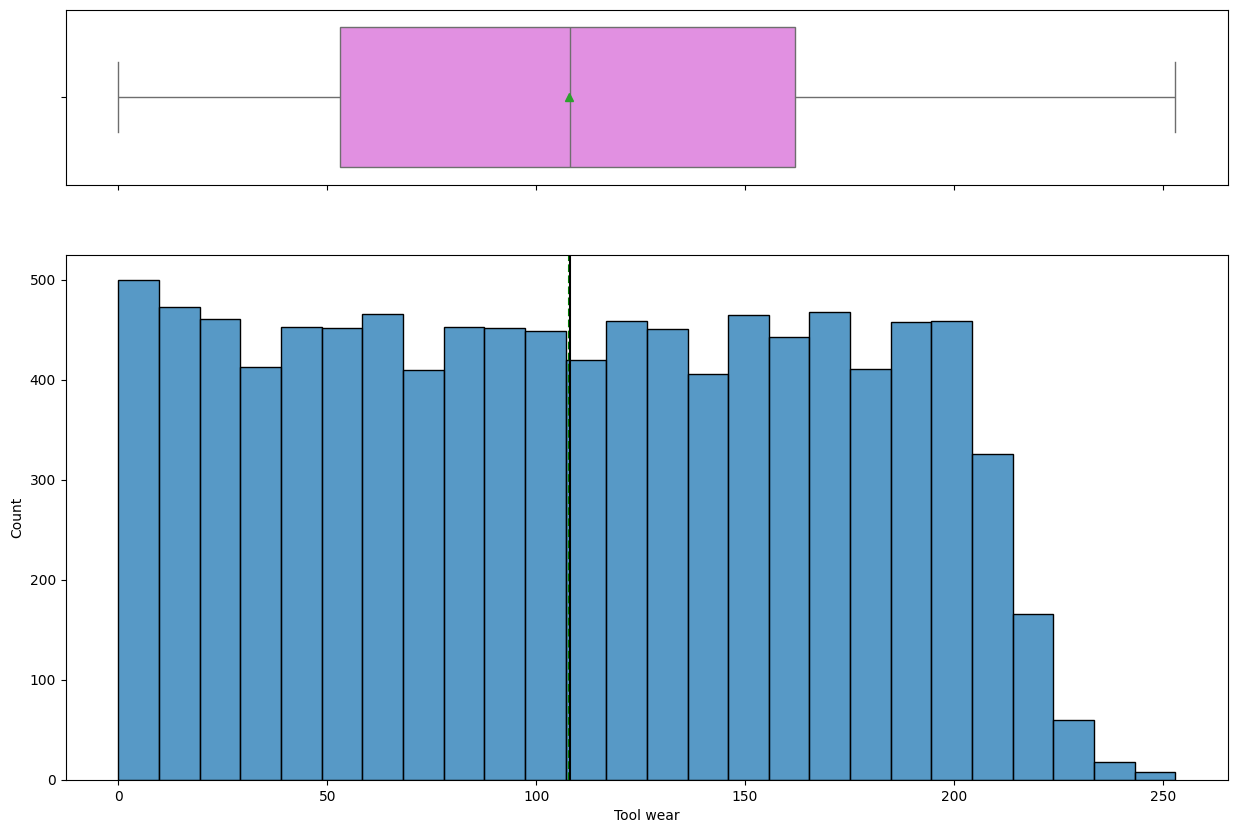

In [12]:
histogram_boxplot(data, "Tool wear")

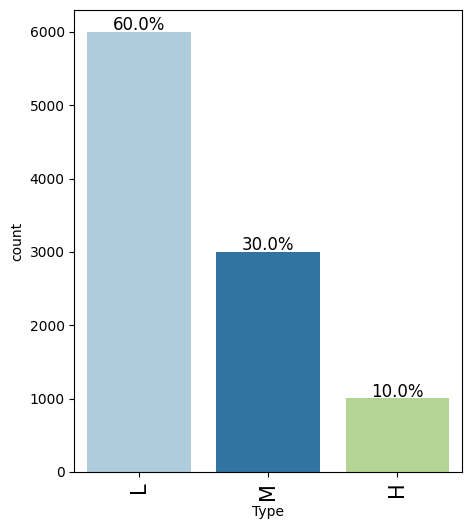

In [13]:
labeled_barplot(data, "Type", perc=True)

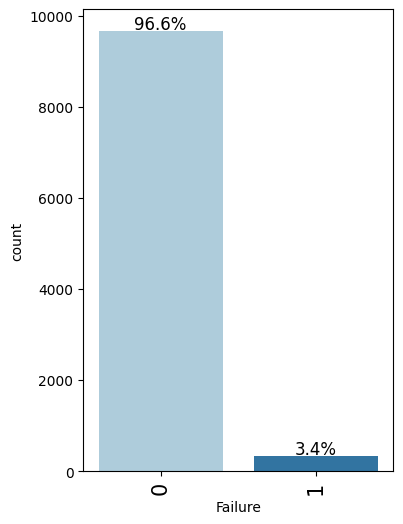

In [14]:
labeled_barplot(data, "Failure", perc=True)

BIVARIATE ANALYSIS

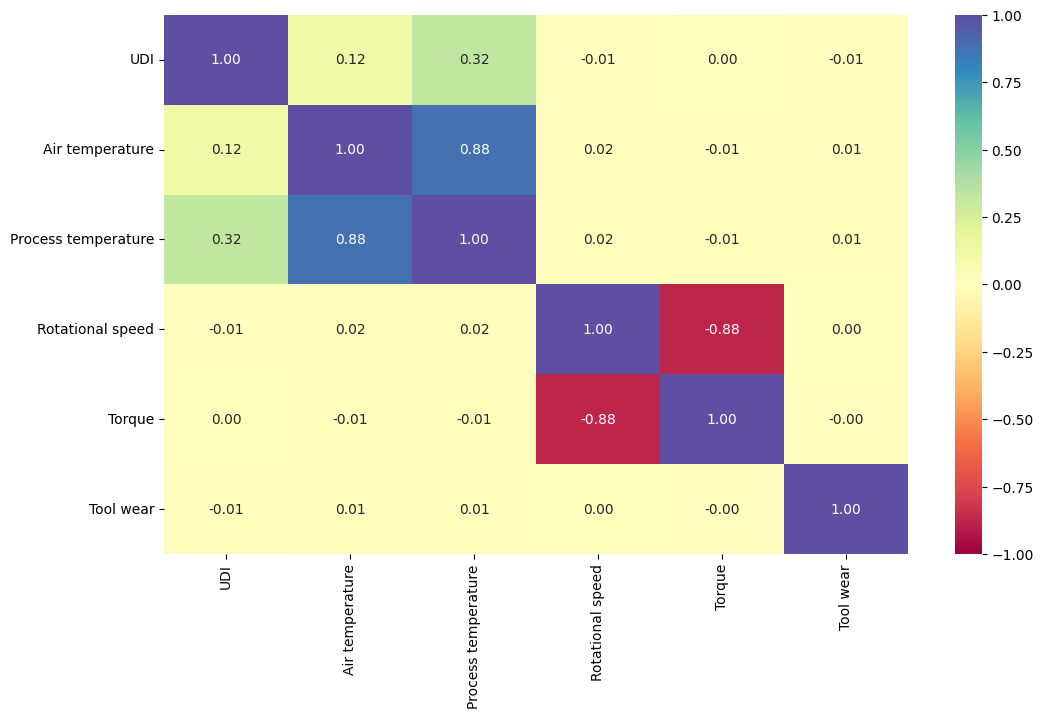

In [15]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


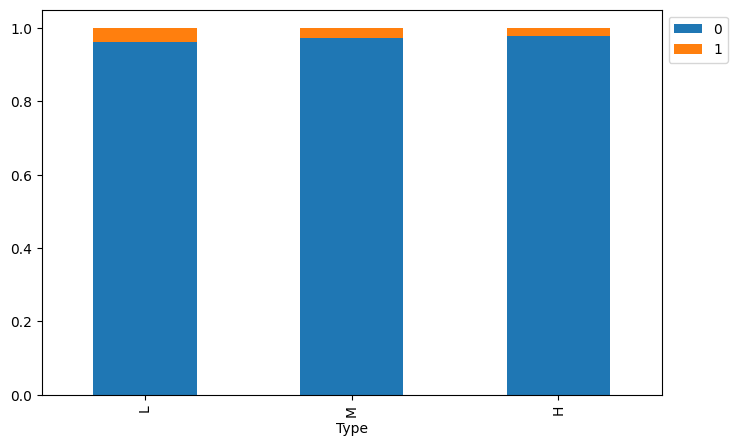

In [16]:
stacked_barplot(data, "Type", "Failure")

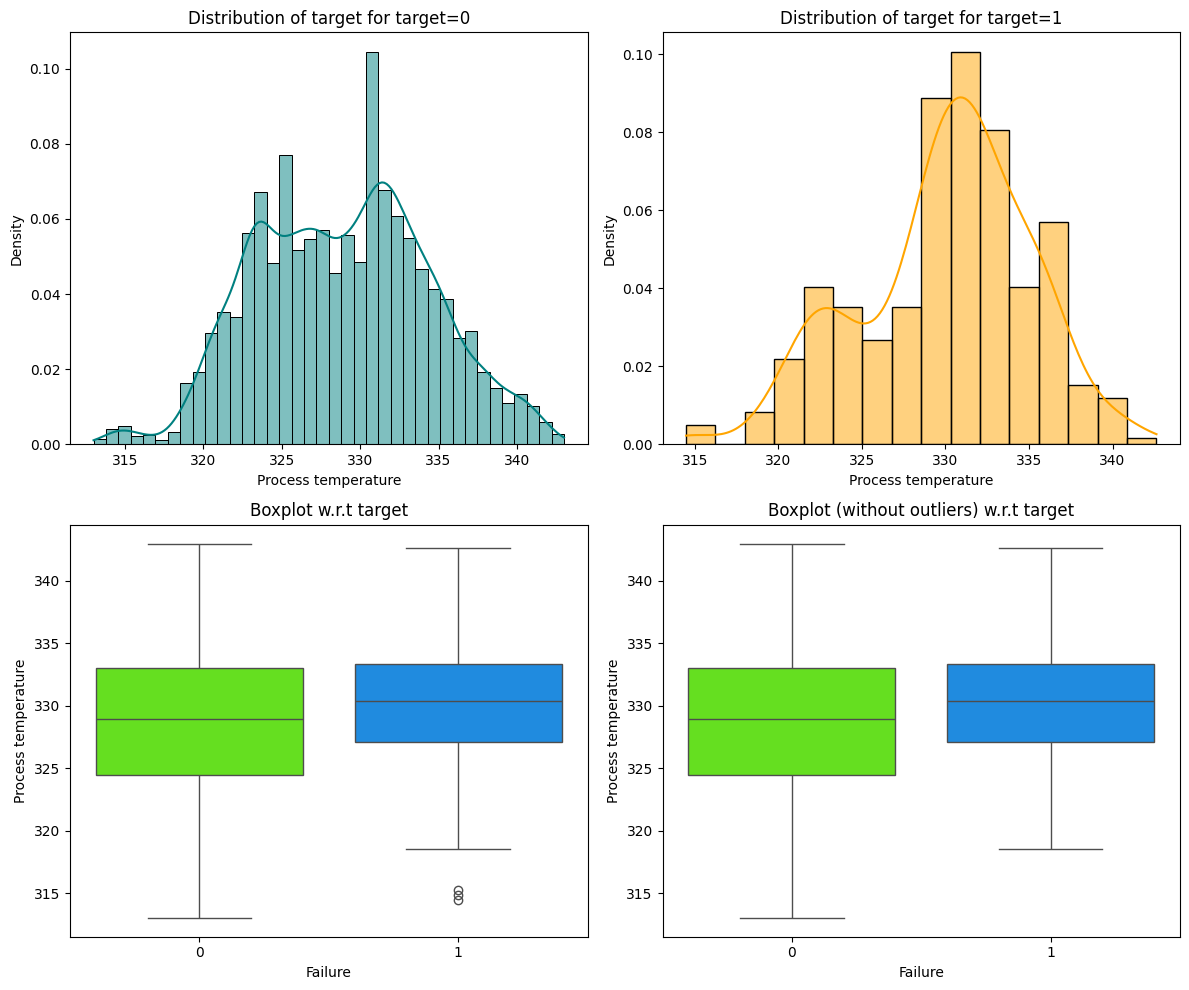

In [17]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

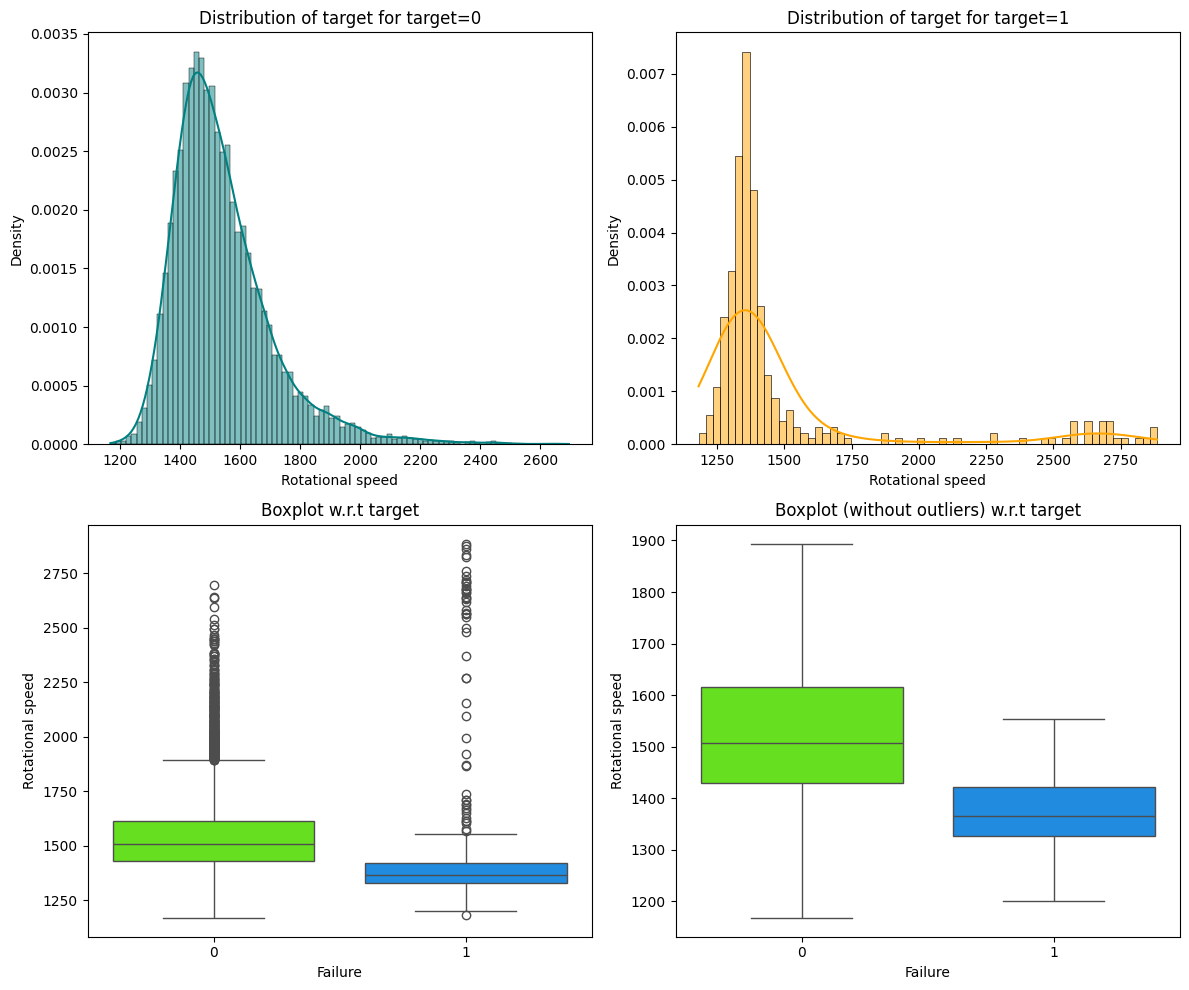

In [18]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

DATA PREPROCESSING

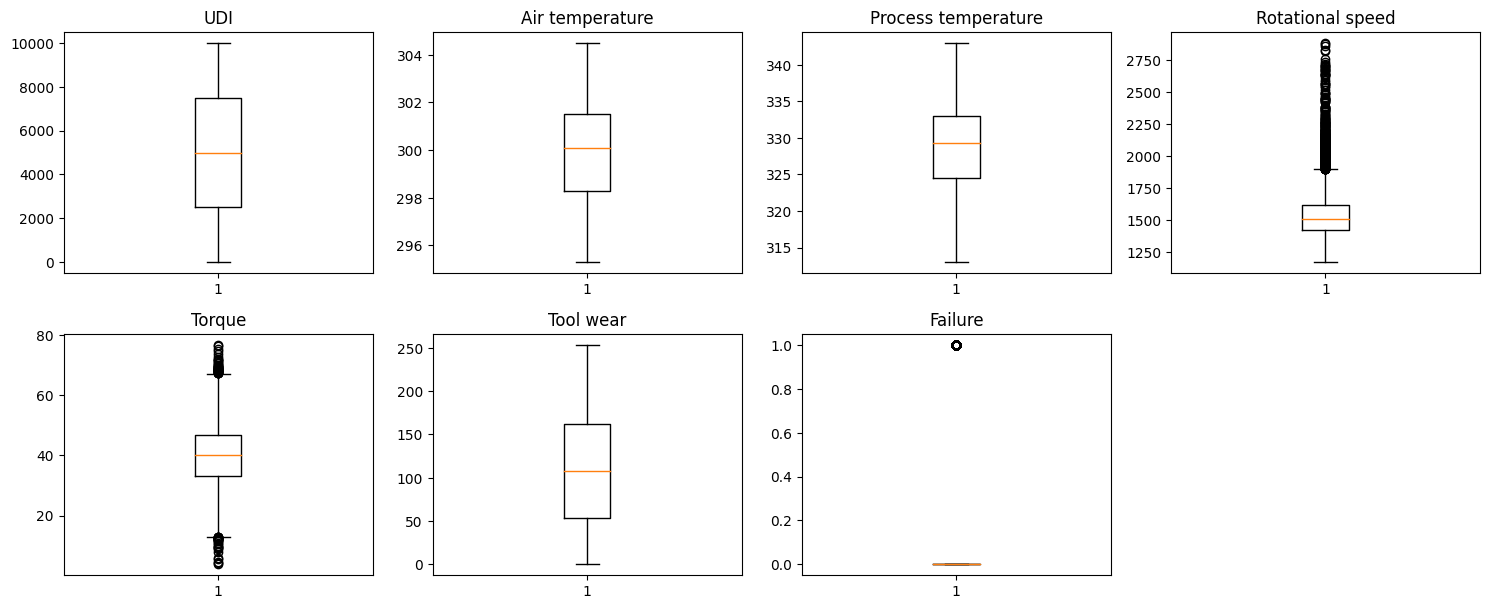

Shape of Training set :  (7000, 8)
Shape of test set :  (3000, 8)
Percentage of classes in training set:
Failure
0    0.966286
1    0.033714
Name: proportion, dtype: float64
Percentage of classes in test set:
Failure
0    0.965667
1    0.034333
Name: proportion, dtype: float64


In [20]:
#OUTLIER DETECTION
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#For Modelling
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

In [21]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [22]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

DECISION TREE (DEFAULT)

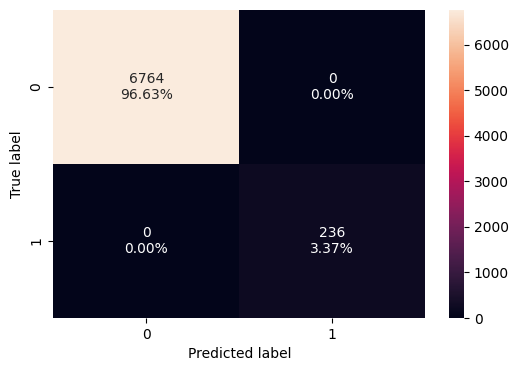

In [23]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
confusion_matrix_sklearn(model0, X_train, y_train)

In [25]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


,Accuracy,Recall,Precision,F1
0,0.977333,0.728155,0.652174,0.688073


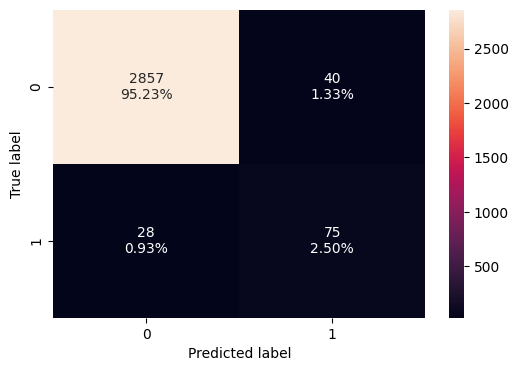

In [26]:
confusion_matrix_sklearn(model0, X_test, y_test)
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

DECISISON TREE WITH CLASS WEIGHTS

In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

class_weight is a hyperparameter for the decision tree classifier

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


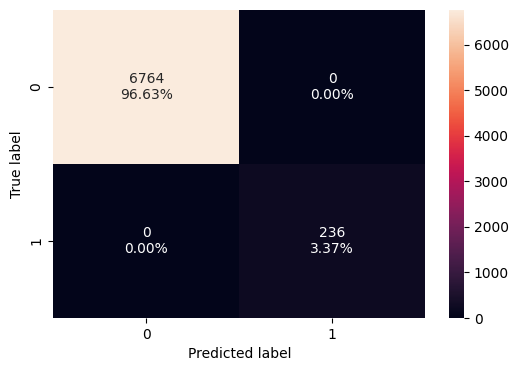

In [27]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

confusion_matrix_sklearn(model1, X_train, y_train)

decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.975333,0.601942,0.652632,0.626263


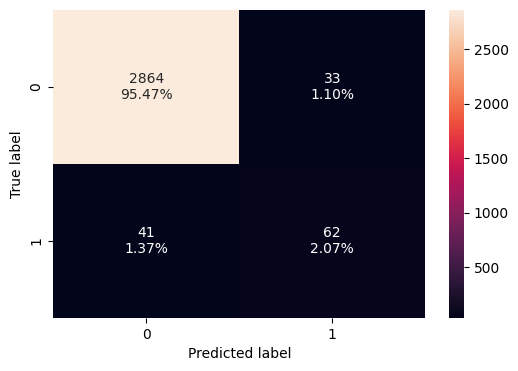

In [28]:
confusion_matrix_sklearn(model1, X_test, y_test)

decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

DECISION TREE (PRE pRUNING)

In [29]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 70
Best test recall score: 0.9611650485436893


In [30]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=42)

,Accuracy,Recall,Precision,F1
0,0.931,0.970339,0.324823,0.486716


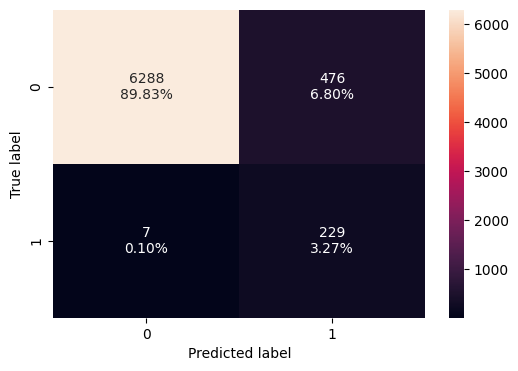

In [32]:
confusion_matrix_sklearn(model2, X_train, y_train)

decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.931667,0.961165,0.33,0.491315


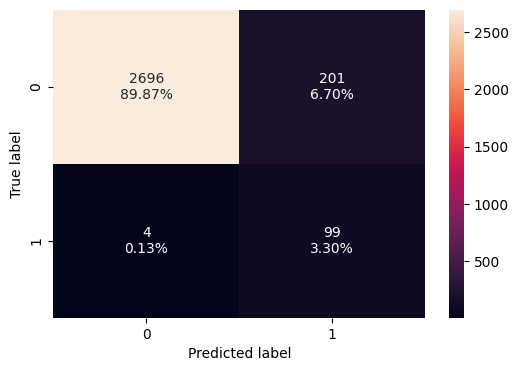

In [33]:
confusion_matrix_sklearn(model2, X_test, y_test)

decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

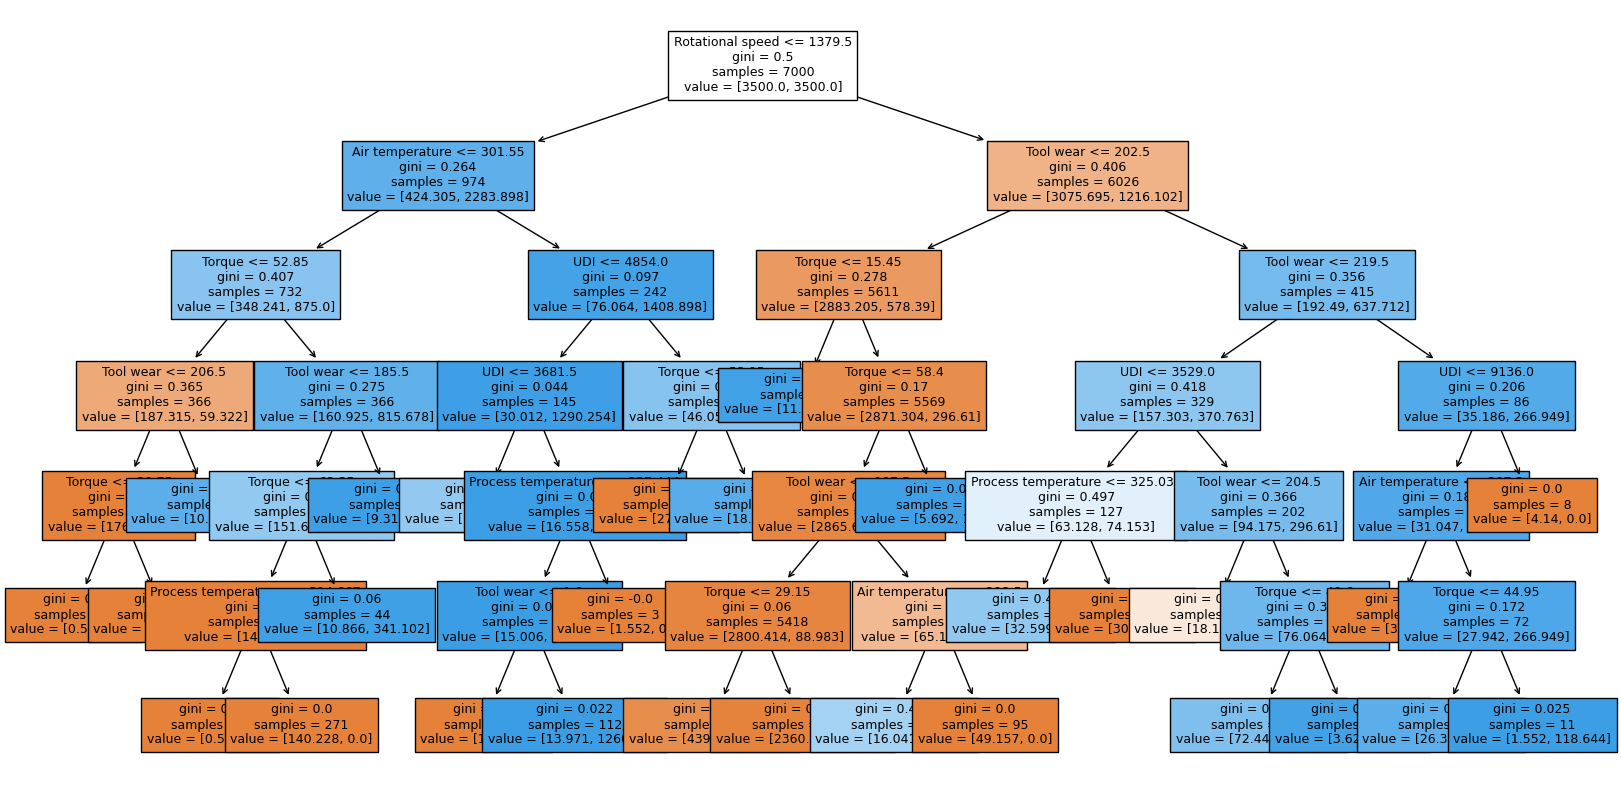

In [34]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [35]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- Torque <= 39.75
|   |   |   |   |   |--- weights: [0.52, 0.00] class: 0
|   |   |   |   |--- Torque >  39.75
|   |   |   |   |   |--- weights: [176.45, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- Process temperature <= 314.67
|   |   |   |   |   |   |--- weights: [0.52, 0.00] class: 0
|   |   |   |   |   |--- Process temperature >  314.67
|   |   |   |   |   |   |--- weights: [140.23, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- UDI <= 4854.00
| 

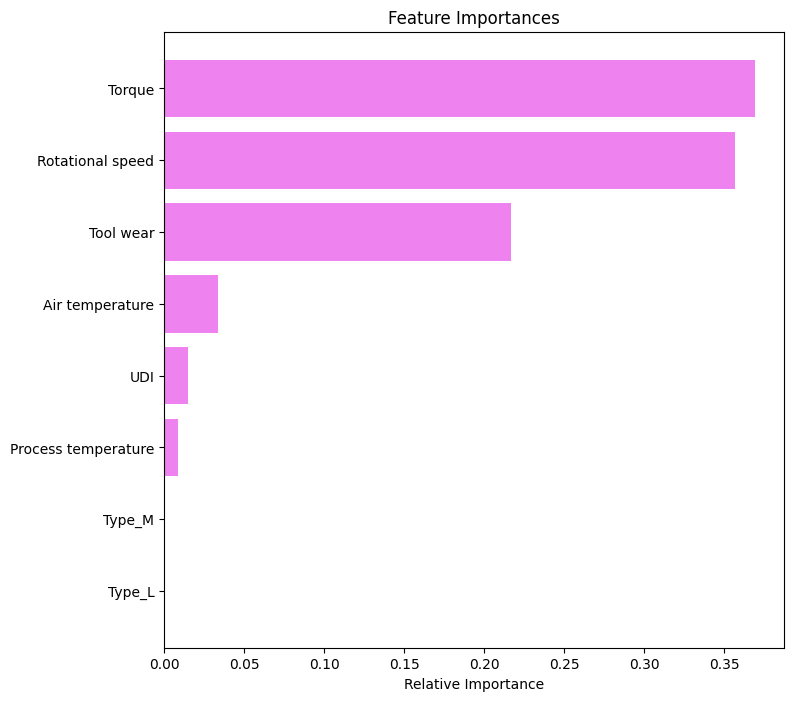

In [36]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

POST PRUNING

In [37]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.001781e-16
1,3.373016e-18,-1.968051e-16
2,7.107134e-18,-1.896979e-16
3,7.107134e-18,-1.825908e-16
4,7.107134e-18,-1.754837e-16
...,...,...
90,1.578143e-02,1.818710e-01
91,4.268458e-02,2.245555e-01
92,5.756867e-02,2.821242e-01
93,6.911602e-02,3.512402e-01


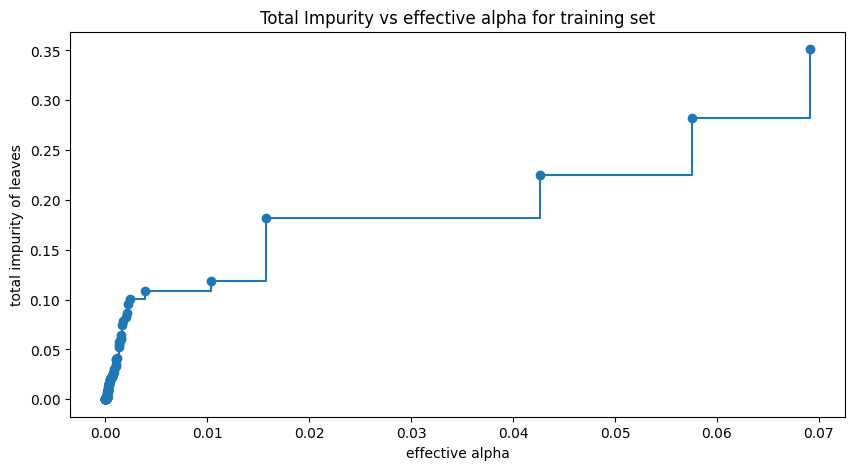

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1487597607707618


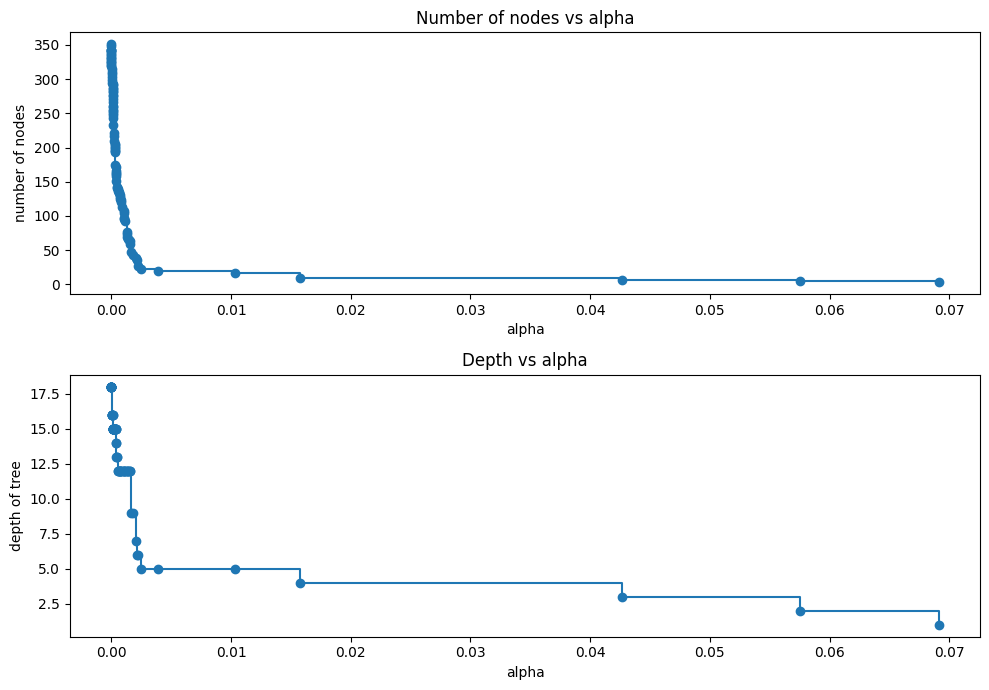

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

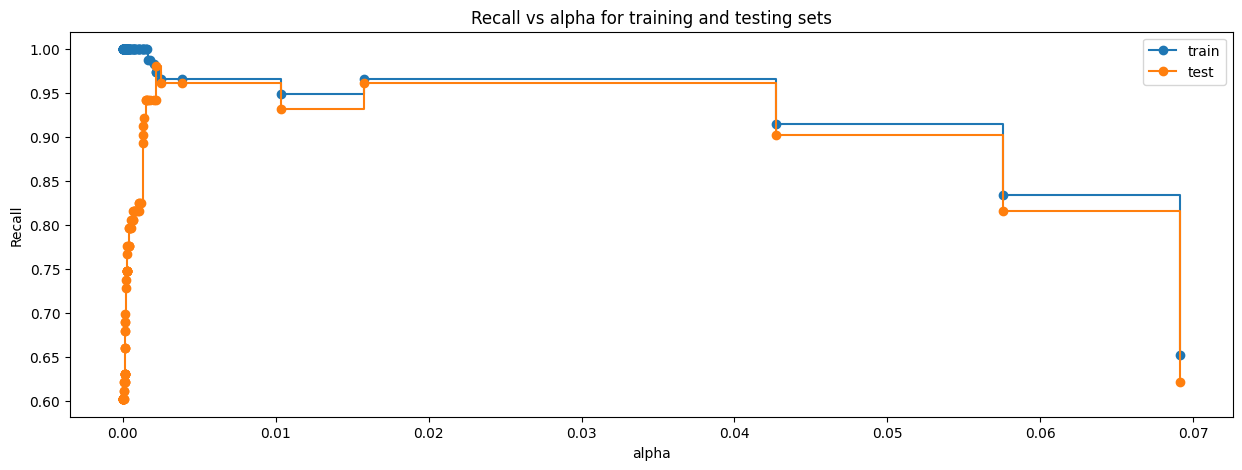

In [40]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

DecisionTreeClassifier(ccp_alpha=0.0021953708165944035, class_weight='balanced',
                       random_state=1)


,Accuracy,Recall,Precision,F1
0,0.915,0.974576,0.28083,0.436019


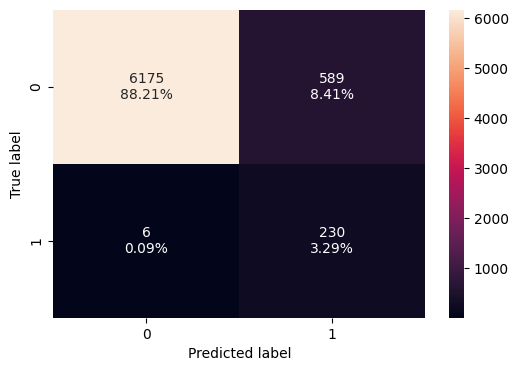

In [44]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train



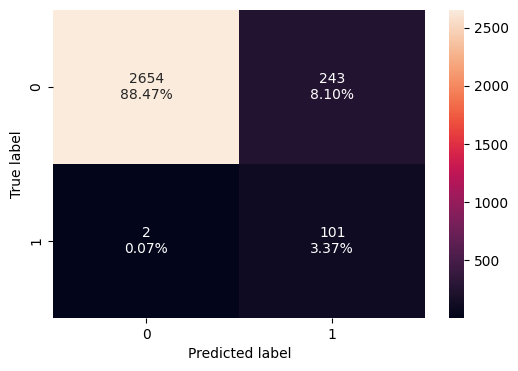

In [46]:


confusion_matrix_sklearn(model4, X_test, y_test)

In [47]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.918333,0.980583,0.293605,0.451902


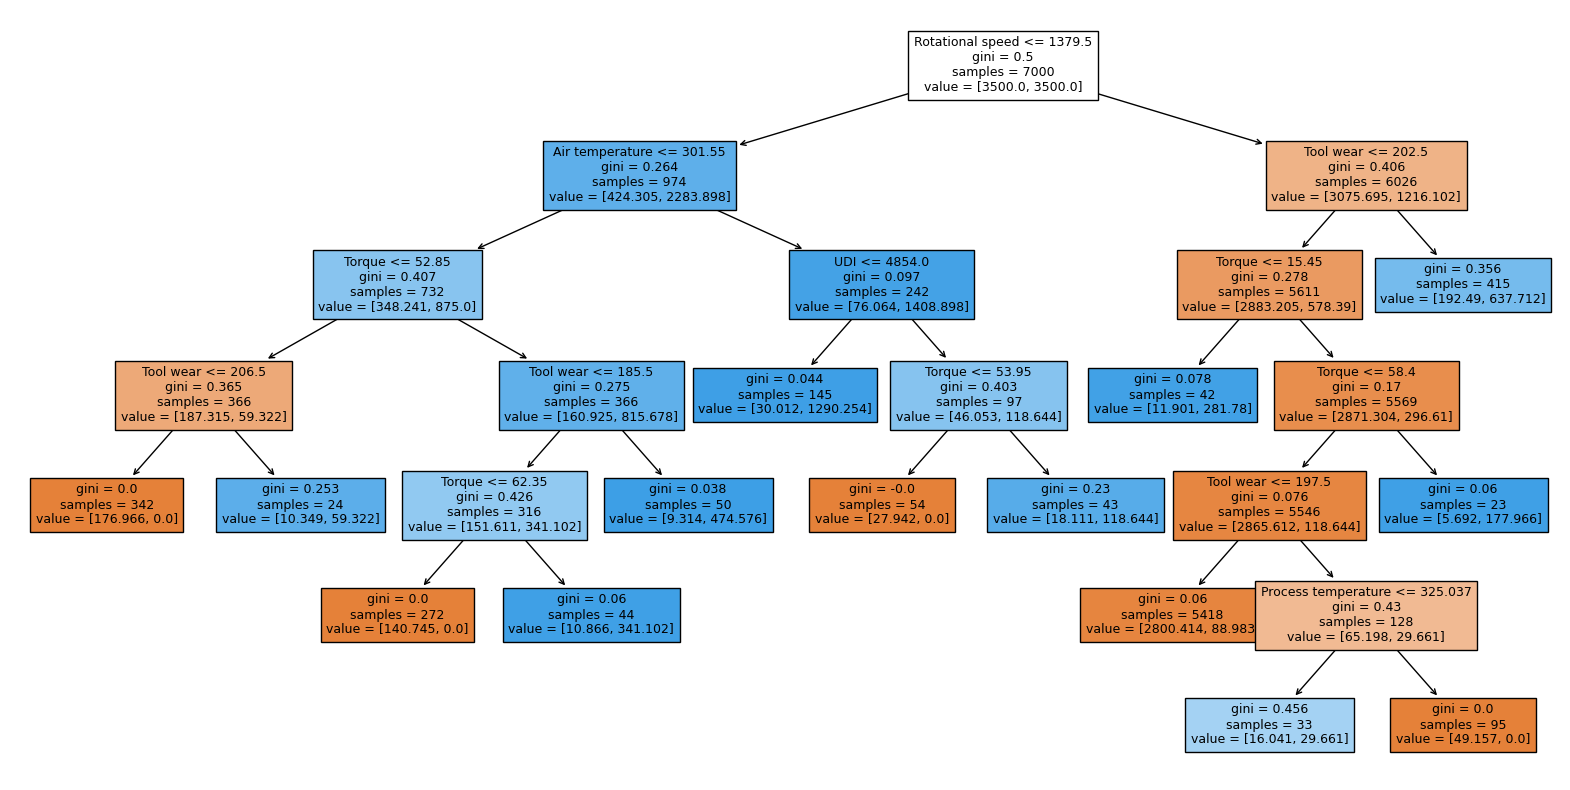

In [48]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [49]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- weights: [140.75, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- UDI <= 4854.00
|   |   |   |--- weights: [30.01, 1290.25] class: 1
|   |   |--- UDI >  4854.00
|   |   |   |--- Torque <= 53.95
|   |   |   |   |--- weights: [27.94, 0.00] class: 0
|   |   |   |--- Torque >  53.95
|   |   |   |   |--- weights: [18.11, 118.64] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 2

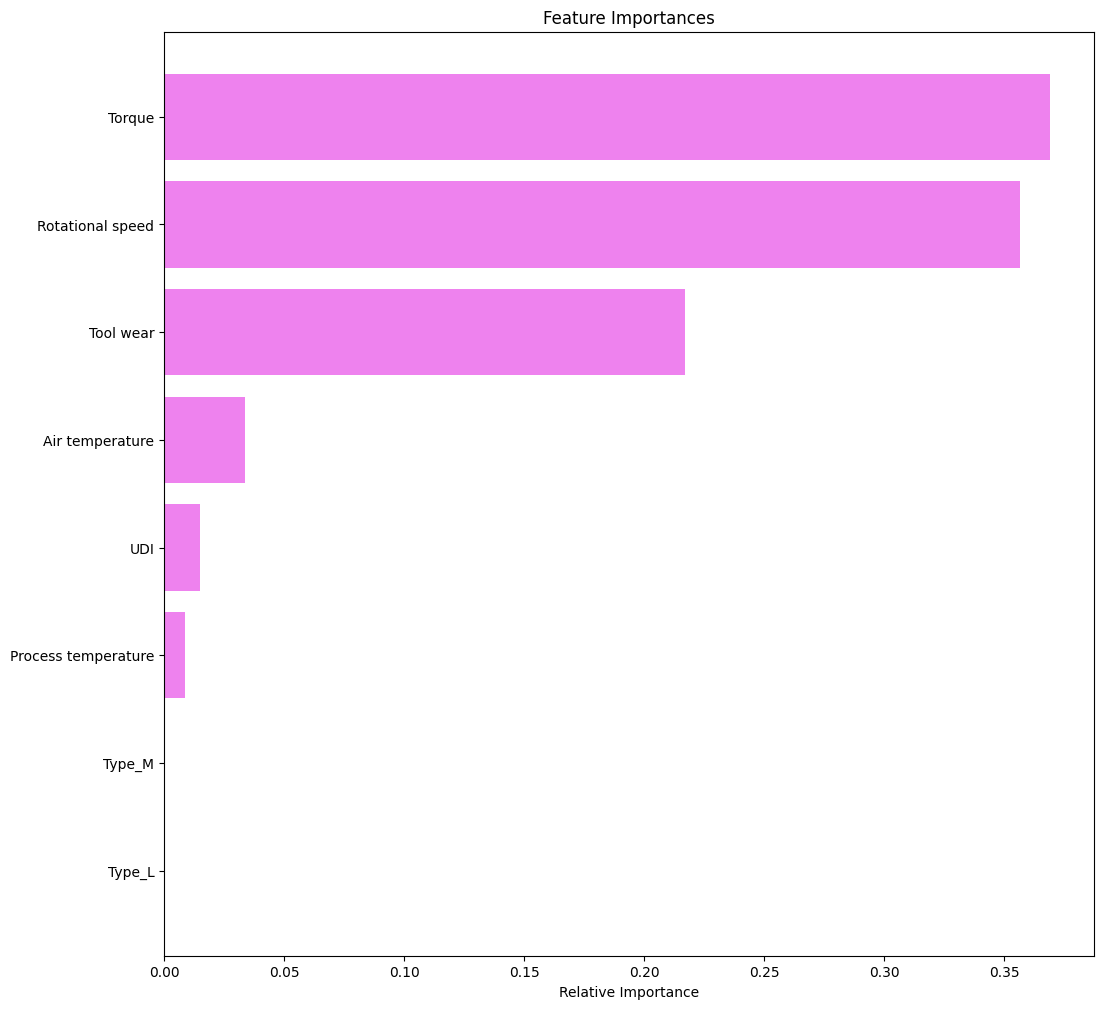

In [50]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [51]:
#comparing bothe the models
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.931000,0.915000
Recall,1.0,1.0,0.970339,0.974576
Precision,1.0,1.0,0.324823,0.280830
F1,1.0,1.0,0.486716,0.436019


In [52]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977333,0.975333,0.931667,0.918333
Recall,0.728155,0.601942,0.961165,0.980583
Precision,0.652174,0.652632,0.330000,0.293605
F1,0.688073,0.626263,0.491315,0.451902


Decision tree models with post-pruning is giving high recall scores on both training and test sets.
Therefore, we are choosing the post-pruned tree as our best model.